# 用pandas預測人生財務曲線

In [4]:
# 這裡用中文當變數方便說明
起始資金 = 10 # 單位: 萬
每月薪水 = 4
每月開銷 = 1.5 # 不含房租
每月房租 = 1.2
退休年齡 = 65
預測時段 = range(25, 90, 1)

# 每年淨額 計算
每年淨額就是每年銀行帳戶的變化值，也就是當年的**總收入** - **總支出**
* 收入的部分有：薪水
* 支出的部分有：開銷、房租

其他必須考慮的: 起始資金跟退休年齡



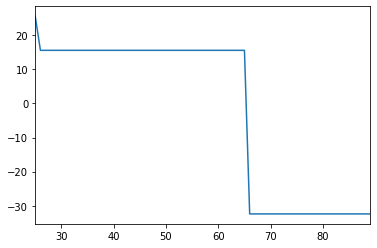

In [6]:
import pandas as pd

# 每年淨額
每年淨額 = pd.Series(0, index=預測時段)
每年淨額.iloc[0] = 起始資金
每年淨額.loc[:退休年齡] += 每月薪水 * 12
每年淨額 -= (每月開銷 + 每月房租) * 12

%matplotlib inline
每年淨額.plot()

### 沒有投資的總資產變化情況

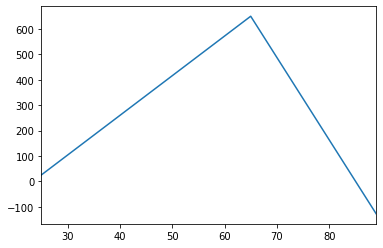

In [7]:
# 無投資總資產

無投資總資產 = 每年淨額.cumsum()
無投資總資產.plot()

### 有投資的總資產變化情況

每年，我們都審視前年的帳戶，將資金分成兩份
* 投資金額 = 總帳戶金額 * 投資部位
* 存在帳戶裡不動錢 = 總帳戶金額 * (1 - 投資部位)

所以今年底的帳戶餘額 = 投資金額 * 投資年利率 + 存在帳戶裡不動的錢 + 今年淨額

於是我們可以寫一個函式代表每年的資產增加變化：

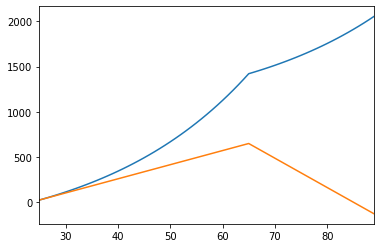

In [8]:
投資部位 = 0.7
投資年利率 = 5 # 5% 投報率

def compound_interest(arr, ratio, return_rate): # 丟3個變數: 每年淨額(series)、投資部位、投資年利率
    ret = [arr.iloc[0]] # 第一年的淨額 = 每年淨額裡的第一筆，也就是起始資金
    for v in arr[1:]: 
        ret.append(ret[-1] * ratio * (return_rate/100+1) + ret[-1] * (1 - ratio) + v)
    return pd.Series(ret, 預測時段)

投資總資產 = compound_interest(每年淨額, 投資部位, 投資年利率)
投資總資產.plot()
無投資總資產.plot()

# 考慮買房的話
* 假設買房總共要花「買房價格」
* 然後一開始，我們會付「買房頭期款」
* 在到達「買房年紀」以前，先租房；從「買房年紀」以後，就是付貸款
* 設定「貸款年數」，設定究竟想要貸款幾年
* 貸款就得付「房貸利率」（％）！

In [10]:
買房價格 = 700
買房頭期款 = 200
買房年紀 = 35
房貸利率 = 2
貸款年數 = 20

# 先計算每年的買房花費

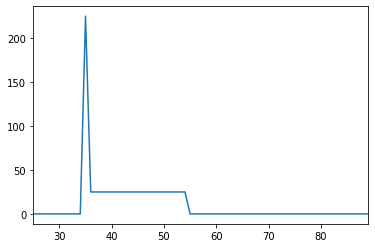

In [11]:
買房花費 = pd.Series(0, index=預測時段)
買房花費[買房年紀] = 買房頭期款
買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
買房花費.plot()

# 接下來計算貸款的利息

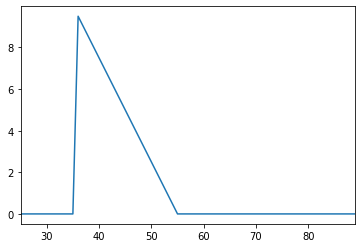

In [14]:
# 先計算有多少欠款
欠款 = pd.Series(0, index=預測時段)
欠款[買房年紀] = 買房價格
欠款 = 欠款.cumsum()
欠款 = 欠款 - 買房花費.cumsum()
# 欠款.plot()
#
利息 = 欠款.shift().fillna(0) * 房貸利率 / 100
利息.plot()

# 計算繳房租

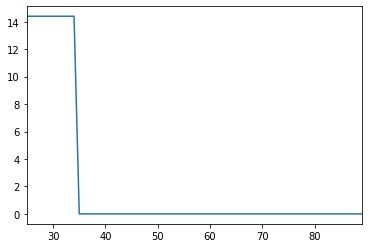

In [15]:
房租年繳 = pd.Series(每月房租*12, index=預測時段)
房租年繳.loc[買房年紀:] = 0
房租年繳.plot()

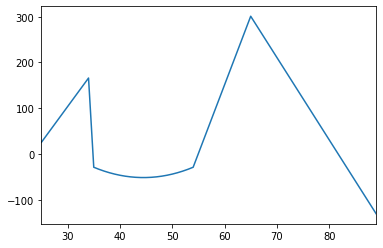

In [16]:
每年淨額_買房 = pd.Series(0, index=預測時段)
每年淨額_買房.iloc[0] = 起始資金
每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
每年淨額_買房.cumsum().plot()
# 每年淨額_買房.plot()

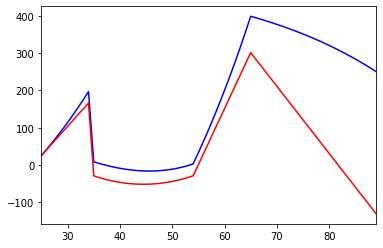

In [18]:
投資_買房_總資產 = compound_interest(每年淨額_買房, 投資部位, 投資年利率)
#
# 投資總資產.plot(color='green') # 有投資沒買房
# 無投資總資產.plot(color='black') # 沒投資沒買房
投資_買房_總資產.plot(color='blue') # 有投資有買房
每年淨額_買房.cumsum().plot(color='red') #沒投資有買房


### 結論

1. 絕對要開始投資，讓資產報酬率在每年5％就差很多了！
2. 買不買房差很大！
3. 投資部位很重要